In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 
        
def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def shadowedKappaMuPDF(r, kappa, mu, omega, md):
  '''
  shadowed kappa-mu pdf (type 1).
  '''
  A = 2 * r**((2*mu) -1) / omega**(mu)
  B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
  C = np.exp((- mu * (1+kappa) * r**2) / omega)
  D = (mu**2) * kappa * (1+kappa) * (r**2)
  E = ((mu*kappa)+md) * omega
  F = sp.hyp1f1(md, mu, D / E)

  pdf = A * B * C * F
  return pdf

def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
  '''
  shadowed kappa-mu pdf (type 2).
  '''
  A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
  B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
  C = (ms+mu)/2
  D = (1+ms+mu)/2
  E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
  F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
  G = sp.hyp2f1( C, D, mu, E / F )

  pdf = (A/B)*G
  return pdf

def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
  '''
  shadowed kappa-mu pdf (type 3).
  '''
  A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
  B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
  C = (mt+mu)
  D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
  E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
  F = sp.hyp1f1(C, mu, D/E )

  pdf = (A/B)*F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

In [6]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, md):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF(X, kappa, mu, omega, md)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF(X, kappa, mu, omega, md)/np.sum(shadowedKappaMuPDF(X, kappa, mu, omega, md))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu in the Fitness Function
  It fits kappa, mu, omega, md
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 11), # kappa
                        random.uniform(0.01, 3.0), # mu
                        random.uniform(0.01, 3.0), # r_hat^2
                        random.uniform(0.01, 20.0))) # md

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Md: {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    elements_md = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])
      elements_md.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_md) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      # print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}\nMd: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))

      toc()
      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]

# Composite Fading Fitting (PARAMETERS)

In [7]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 1) - Path: AB

In [8]:
path = 'AB'

### AP 1

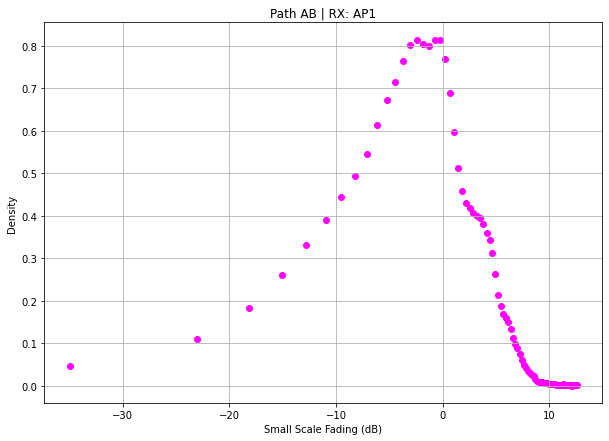

In [9]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [10]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(1035, 236)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Best Fitness: 1035.1497025705185
Best Gen: 175
Kappa: 1.0140807679081105
Mu: 1.1492359397962393
Omega: 1.38373095552919
Md: 0.4436927909272979
Elapsed time is 47.305341958999634 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Best Fitness: 236.35261273791681
Best Gen: 199
Kappa: 0.5182906289878755
Mu: 1.0279005452807388
Omega: 1.3318404401818882
Md: 0.4341749840915273
Elapsed time is 35.461127042770386 seconds.


(1035, 236)

#### Plots

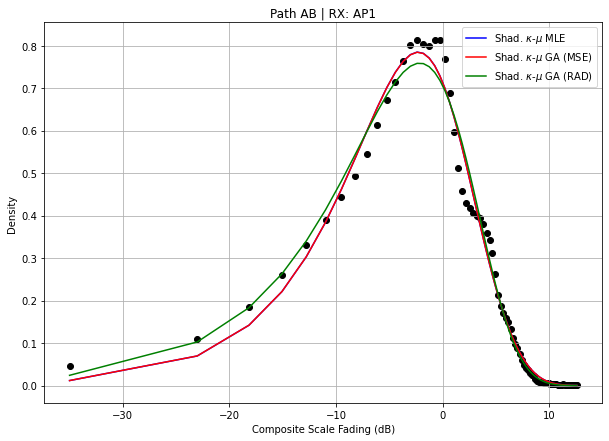

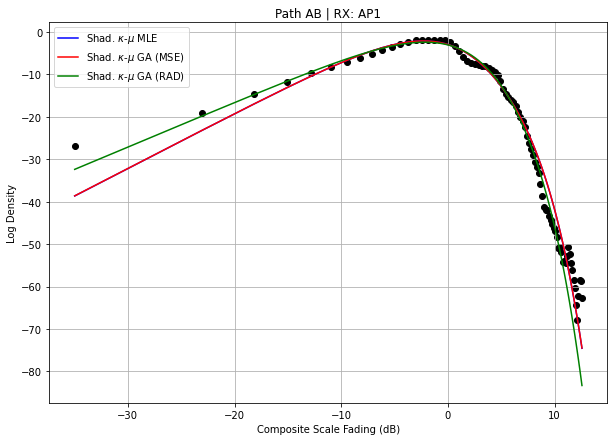

In [11]:
mle_sku_t1_pathAB_ap1 = [1.0124, 1.1497, 1.3829, 0.44353]
sku_t1_AB_ap1_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap1[0], mle_sku_t1_pathAB_ap1[1], mle_sku_t1_pathAB_ap1[2], mle_sku_t1_pathAB_ap1[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap1_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap1_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad )), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [12]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap1[0], mle_sku_t1_pathAB_ap1[1], mle_sku_t1_pathAB_ap1[2], mle_sku_t1_pathAB_ap1[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31906.591836
1,Maximum Likelihood Estimator - Shadowed KappaMu,31975.554556
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31976.012395


### AP 2

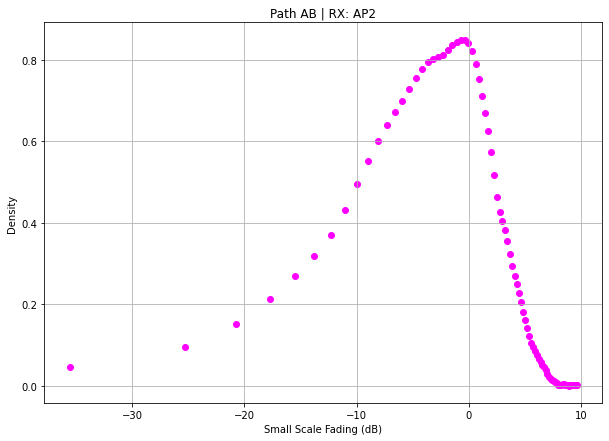

In [13]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [14]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(3263, 1068)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Best Fitness: 3291.547624468222
Best Gen: 160
Kappa: 2.453411468164558
Mu: 0.9436948613497388
Omega: 1.0475105434559835
Md: 1.592091313495094
Elapsed time is 45.24695086479187 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Best Fitness: 1128.6659628860596
Best Gen: 159
Kappa: 4.162608314732579
Mu: 0.9353130636440148
Omega: 1.0566671923057298
Md: 1.3287118435678371
Elapsed time is 39.754664182662964 seconds.


(3263, 1068)

#### Plots

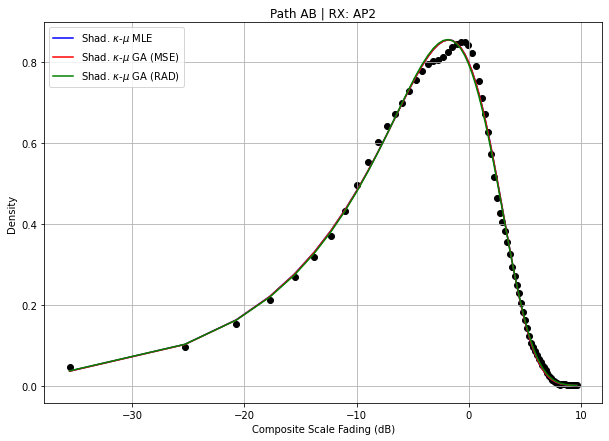

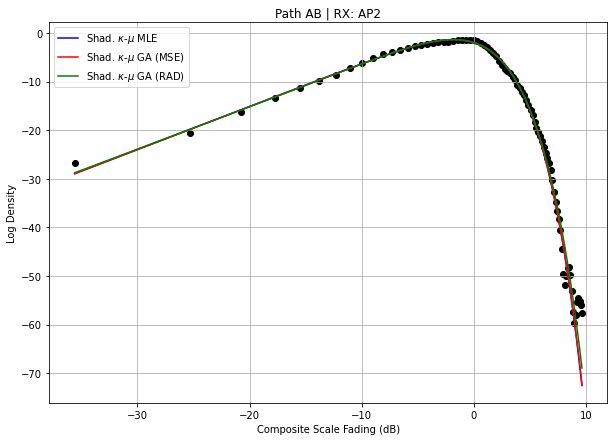

In [15]:
mle_sku_t1_pathAB_ap2 = [2.4447, 0.94293, 1.0470, 1.5968]
sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [16]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),20801.365151
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),20805.804032
2,Maximum Likelihood Estimator - Shad. KappaMu,20806.212984


### AP 3

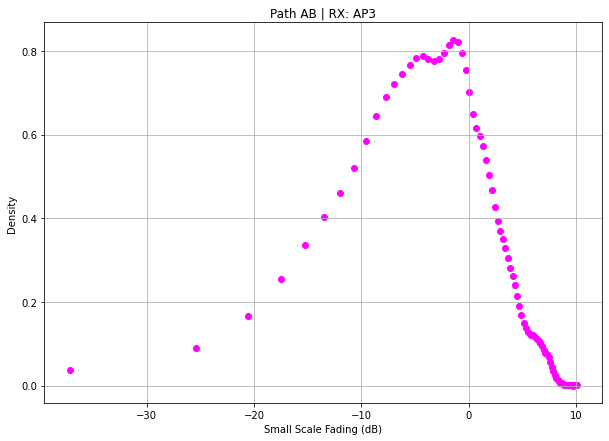

In [17]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [18]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(3056, 195)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Best Fitness: 3056.7012400479857
Best Gen: 178
Kappa: 0.5150801790523585
Mu: 1.0097734233984565
Omega: 1.1787948161822366
Md: 0.22287042668920332
Elapsed time is 43.42584466934204 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Best Fitness: 246.67838648431953
Best Gen: 194
Kappa: 1.7957072428922338
Mu: 1.017522687314266
Omega: 1.1267466614201238
Md: 0.7056134399185044
Elapsed time is 37.07045531272888 seconds.


(3056, 195)

#### Plots

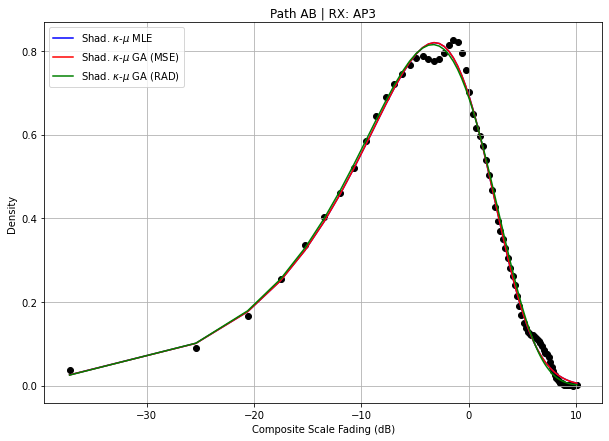

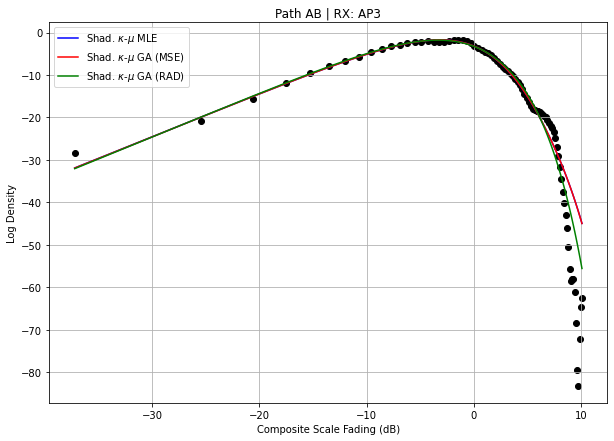

In [19]:
mle_sku_t1_pathAB_ap3 = [0.51026, 1.0093, 1.1791, 0.22022]
sku_t1_AB_ap3_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap3[0], mle_sku_t1_pathAB_ap3[1], mle_sku_t1_pathAB_ap3[2], mle_sku_t1_pathAB_ap3[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap3_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap3_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [20]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap3[0], mle_sku_t1_pathAB_ap3[1], mle_sku_t1_pathAB_ap3[2], mle_sku_t1_pathAB_ap3[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),28781.743821
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),28920.669313
2,Maximum Likelihood Estimator - Shad. KappaMu,28922.350402


### AP 4

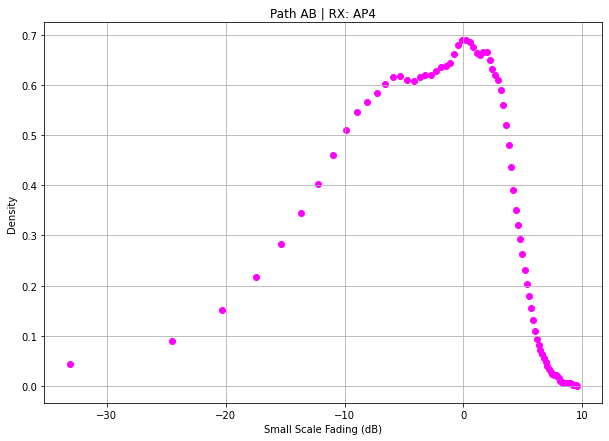

In [21]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [22]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(569, 196)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Best Fitness: 569.2970599132192
Best Gen: 197
Kappa: 1.333520389545404
Mu: 0.7913795722675855
Omega: 1.3352843942892987
Md: 9.21849140112329
Elapsed time is 46.01515340805054 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Best Fitness: 196.3542235394292
Best Gen: 185
Kappa: 1.1999767796973109
Mu: 0.8462082113201925
Omega: 1.2744262144106533
Md: 23.677179122663123
Elapsed time is 33.958688497543335 seconds.


(569, 196)

#### Plots

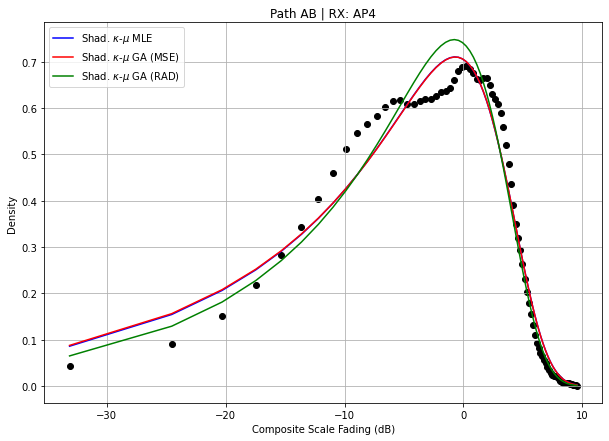

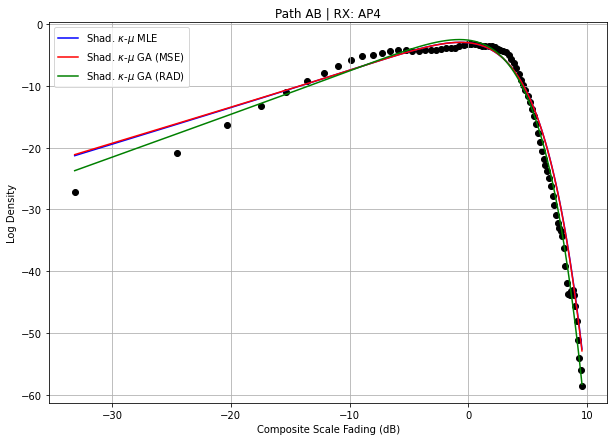

In [23]:
mle_sku_t1_pathAB_ap4 = [1.4423, 0.79539, 1.3368, 5]
sku_t1_AB_ap4_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap4[0], mle_sku_t1_pathAB_ap4[1], mle_sku_t1_pathAB_ap4[2], mle_sku_t1_pathAB_ap4[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap4_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap4_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [24]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap4[0], mle_sku_t1_pathAB_ap4[1], mle_sku_t1_pathAB_ap4[2], mle_sku_t1_pathAB_ap4[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),27609.296212
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),27733.086094
2,Maximum Likelihood Estimator - Shad. KappaMu,27735.632924


### AP 5

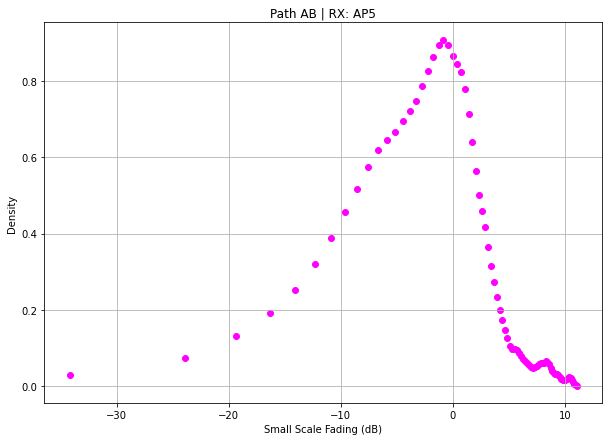

In [25]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [26]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(656, 121)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Best Fitness: 656.8590646072149
Best Gen: 112
Kappa: 3.8469318691924506
Mu: 0.8880425771760564
Omega: 1.0451344417171307
Md: 1.8437417145078263
Elapsed time is 50.07792925834656 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Best Fitness: 121.77898477640795
Best Gen: 51
Kappa: 0.7308951086832235
Mu: 1.2417197138572544
Omega: 1.5801581554051247
Md: 0.0625954190314599
Elapsed time is 37.39711356163025 seconds.


(656, 121)

#### Plots

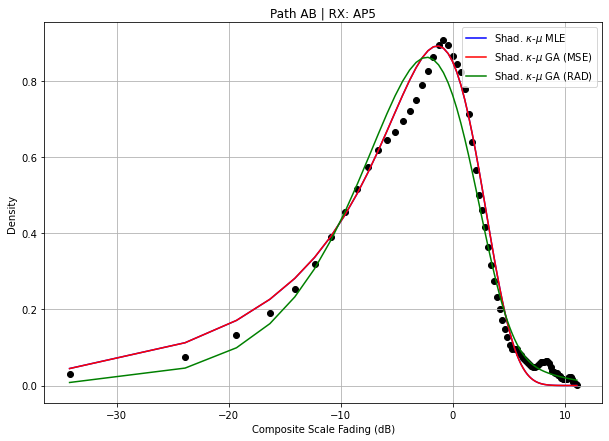

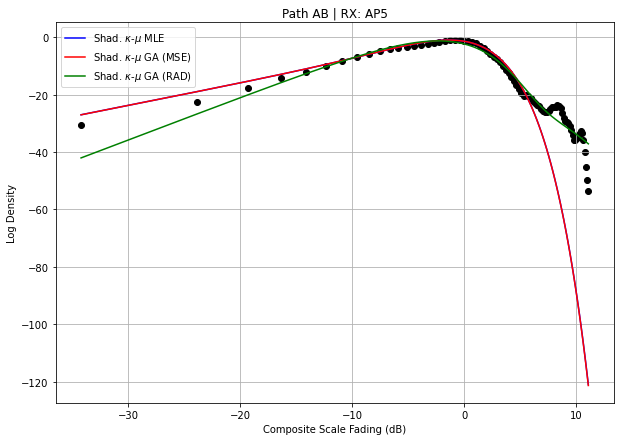

In [27]:
mle_sku_t1_pathAB_ap5 = [3.9094, 0.88723, 1.0457, 1.8299]
sku_t1_AB_ap5_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap5[0], mle_sku_t1_pathAB_ap5[1], mle_sku_t1_pathAB_ap5[2], mle_sku_t1_pathAB_ap5[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap5_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap5_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [28]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap5[0], mle_sku_t1_pathAB_ap5[1], mle_sku_t1_pathAB_ap5[2], mle_sku_t1_pathAB_ap5[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),27101.156435
1,Maximum Likelihood Estimator - Shad. KappaMu,31501.566814
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31525.185476


### AP 6

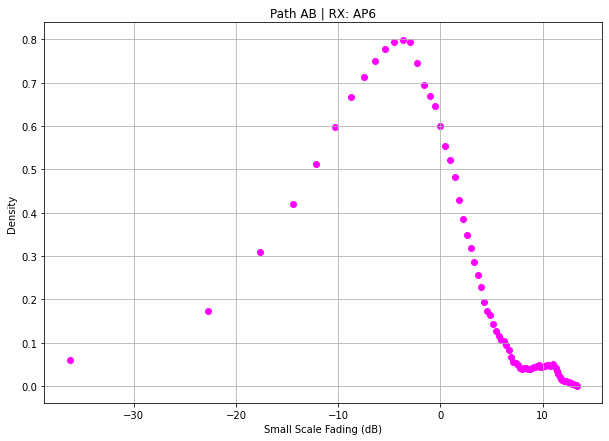

In [29]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [30]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(8072, 194)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Best Fitness: 8072.0715240037025
Best Gen: 183
Kappa: 1.649378327466013
Mu: 0.9329397439634894
Omega: 1.9438551228774448
Md: 0.09184964768973487
Elapsed time is 47.3048141002655 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Best Fitness: 194.12326304110647
Best Gen: 188
Kappa: 1.6130477778367507
Mu: 0.9347273940416033
Omega: 1.87427377635608
Md: 0.10228389917621422
Elapsed time is 38.32215094566345 seconds.


(8072, 194)

#### Plots

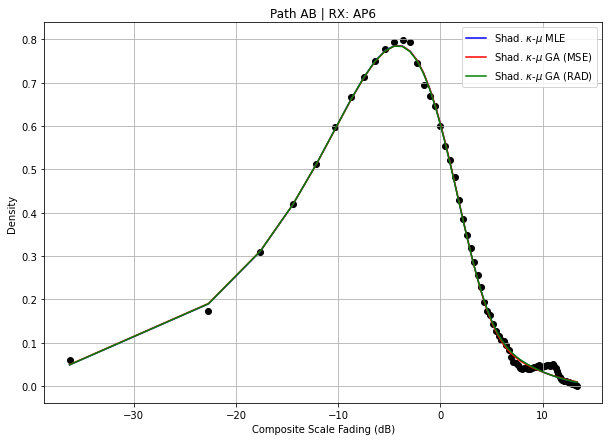

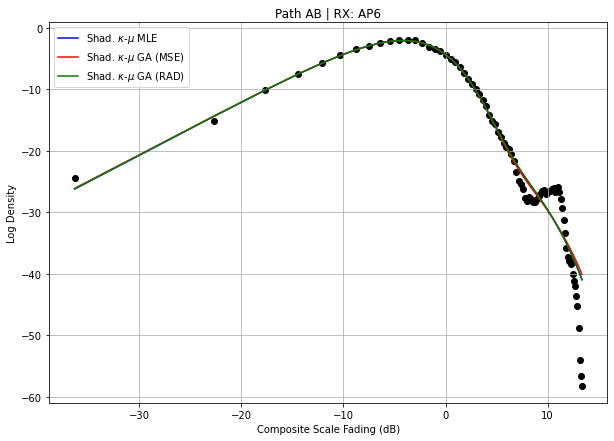

In [31]:
mle_sku_t1_pathAB_ap6 = [1.6065, 0.93539, 1.8788, 0.1]
sku_t1_AB_ap6_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap6[0], mle_sku_t1_pathAB_ap6[1], mle_sku_t1_pathAB_ap6[2], mle_sku_t1_pathAB_ap6[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap6_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap6_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [32]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap6[0], mle_sku_t1_pathAB_ap6[1], mle_sku_t1_pathAB_ap6[2], mle_sku_t1_pathAB_ap6[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),30925.717807
1,Maximum Likelihood Estimator - Shad. KappaMu,30933.694435
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),30993.348819


### AP 7

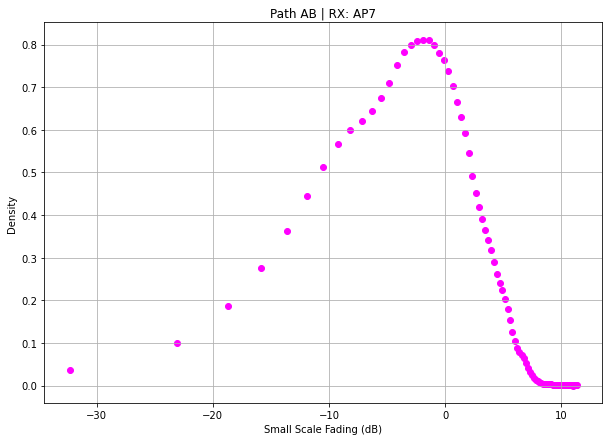

In [33]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [34]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(4711, 861)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Best Fitness: 4745.12504952317
Best Gen: 84
Kappa: 3.5610732929546742
Mu: 0.9685471343771607
Omega: 1.1406091710091948
Md: 1.063047585891675
Elapsed time is 52.037890672683716 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Best Fitness: 860.8914747513851
Best Gen: 12
Kappa: 0.3544761065802079
Mu: 0.995866748506211
Omega: 1.1342227349719007
Md: 4.755769200350488
Elapsed time is 34.941667556762695 seconds.


(4711, 861)

#### Plots

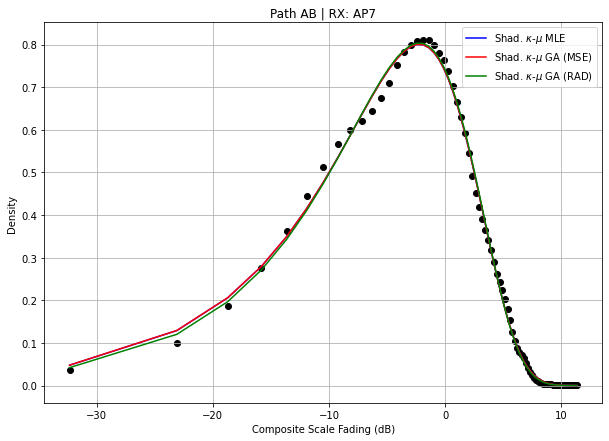

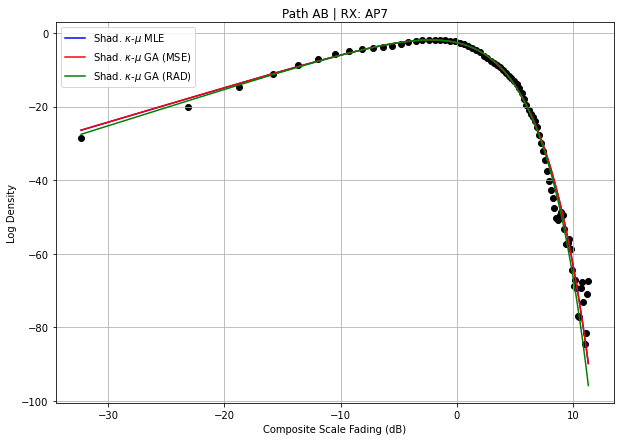

In [35]:
mle_sku_t1_pathAB_ap7 = [3.5731, 0.96933, 1.141, 1.0611]
sku_t1_AB_ap7_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap7[0], mle_sku_t1_pathAB_ap7[1], mle_sku_t1_pathAB_ap7[2], mle_sku_t1_pathAB_ap7[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap7_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap7_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [36]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap7[0], mle_sku_t1_pathAB_ap7[1], mle_sku_t1_pathAB_ap7[2], mle_sku_t1_pathAB_ap7[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),24146.281291
1,Maximum Likelihood Estimator - Shad. KappaMu,24163.704485
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),24163.783898


### AP 8

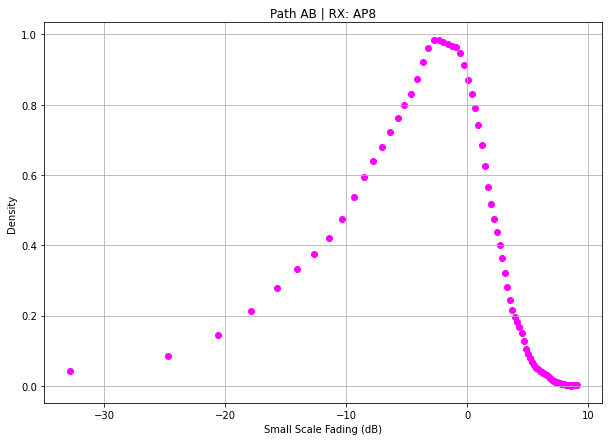

In [37]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [38]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(4516, 679)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Best Fitness: 4516.012113858037
Best Gen: 187
Kappa: 4.271355402182666
Mu: 0.8941846217996967
Omega: 0.8841176912576709
Md: 1.8377887992889161
Elapsed time is 55.970800161361694 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Best Fitness: 679.468212890961
Best Gen: 170
Kappa: 8.72070616742161
Mu: 0.9454590372405877
Omega: 0.9140660901423979
Md: 1.349027855234231
Elapsed time is 48.0010883808136 seconds.


(4516, 679)

#### Plots

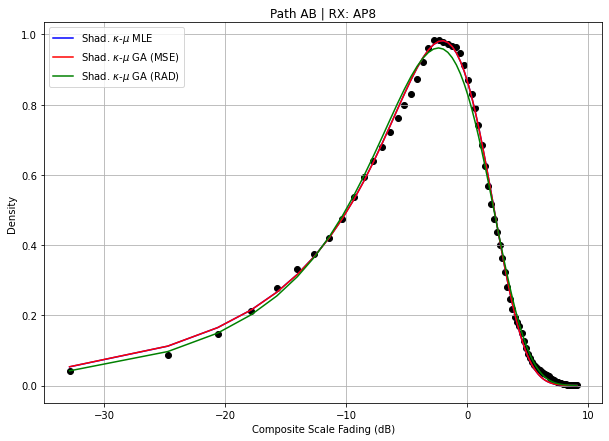

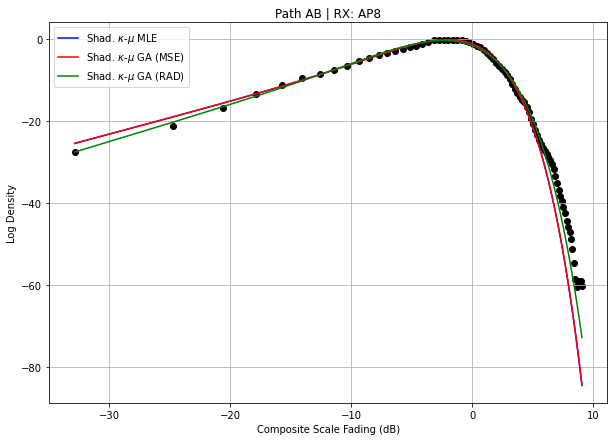

In [39]:
mle_sku_t1_pathAB_ap8 = [4.2103, 0.89571, 0.88403, 1.8455]
sku_t1_AB_ap8_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap8[0], mle_sku_t1_pathAB_ap8[1], mle_sku_t1_pathAB_ap8[2], mle_sku_t1_pathAB_ap8[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap8_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap8_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [40]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap8[0], mle_sku_t1_pathAB_ap8[1], mle_sku_t1_pathAB_ap8[2], mle_sku_t1_pathAB_ap8[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),18133.429172
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),18236.007178
2,Maximum Likelihood Estimator - Shad. KappaMu,18236.317962


### AP 9

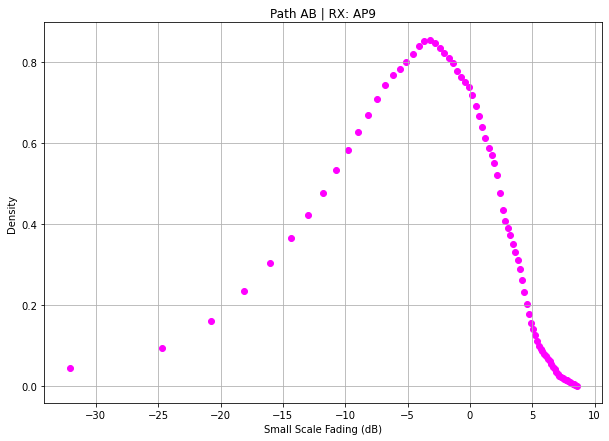

In [41]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [42]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(10204, 2722)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Best Fitness: 8646.641505805868
Best Gen: 36
Kappa: 0.11551274660394613
Mu: 0.9906026045727429
Omega: 1.0252470562836555
Md: 1.374980609717572
Elapsed time is 43.277000427246094 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Best Fitness: 2473.2853745327284
Best Gen: 167
Kappa: 0.1159396072502387
Mu: 1.0050017730533305
Omega: 1.0215347747262322
Md: 1.2823451420259933
Elapsed time is 28.2706036567688 seconds.


(10204, 2722)

#### Plots

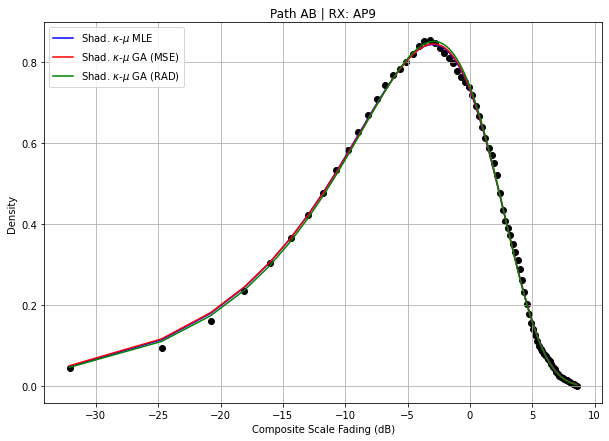

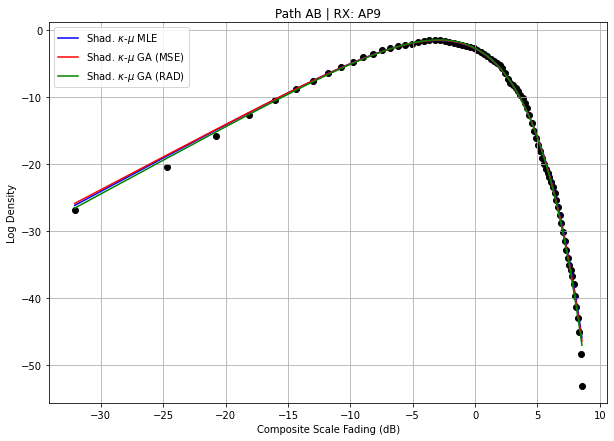

In [43]:
mle_sku_t1_pathAB_ap9 = [6.5017, 1, 1.0291, 0.97988]
sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [44]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),21666.060098
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),21676.459365
2,Maximum Likelihood Estimator - Shad. KappaMu,21678.089124


## Shadowed $\kappa$-$\mu$ (type 1) - Path: BA

In [45]:
path = 'BA'

### AP 1

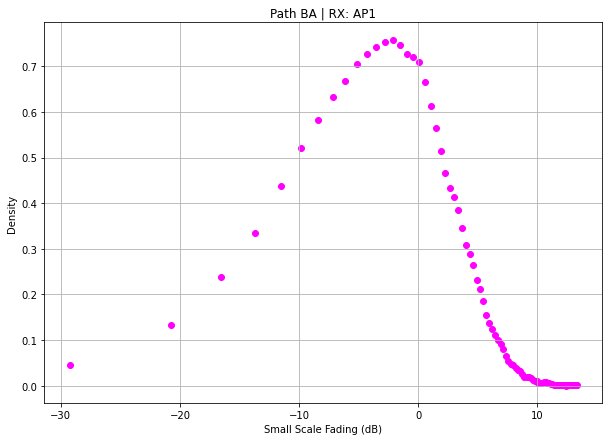

In [46]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [47]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(14111, 1465)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Best Fitness: 14071.794120642964
Best Gen: 195
Kappa: 0.7981205034872878
Mu: 1.0174072468918098
Omega: 1.336163749608623
Md: 0.3839151485766354
Elapsed time is 46.3877649307251 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Best Fitness: 1472.4343007275925
Best Gen: 161
Kappa: 0.50985673476153
Mu: 1.016265686149797
Omega: 1.3562608820904074
Md: 0.21631220447458957
Elapsed time is 36.612929821014404 seconds.


(14111, 1465)

#### Plots

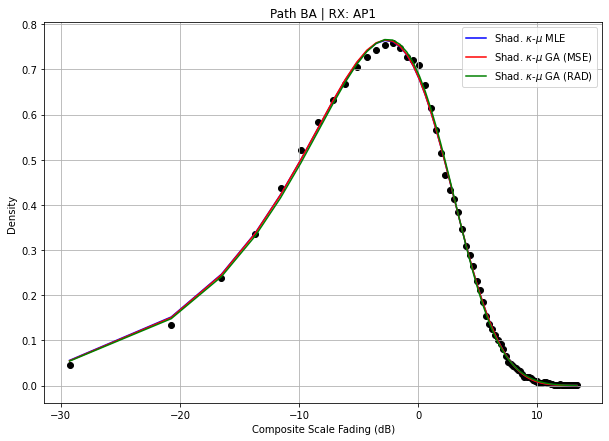

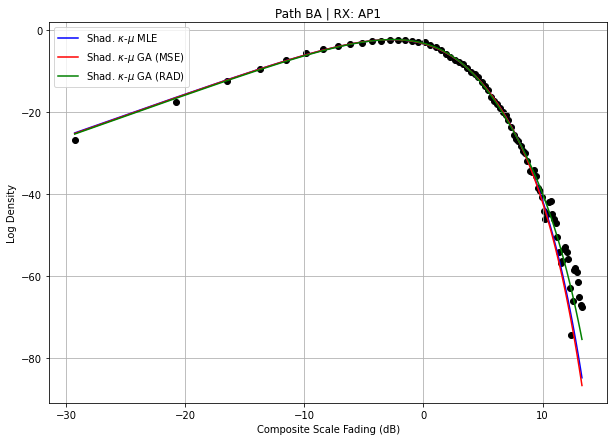

In [48]:
mle_sku_t1_pathBA_ap1 = [0.74221, 1.0136, 1.3408, 0.35551]
sku_t1_BA_ap1_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap1[0], mle_sku_t1_pathBA_ap1[1], mle_sku_t1_pathBA_ap1[2], mle_sku_t1_pathBA_ap1[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap1_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap1_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [49]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap1[0], mle_sku_t1_pathBA_ap1[1], mle_sku_t1_pathBA_ap1[2], mle_sku_t1_pathBA_ap1[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),32035.994525
1,Maximum Likelihood Estimator - Shad. KappaMu,32056.007614
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),32061.304366


### AP 2

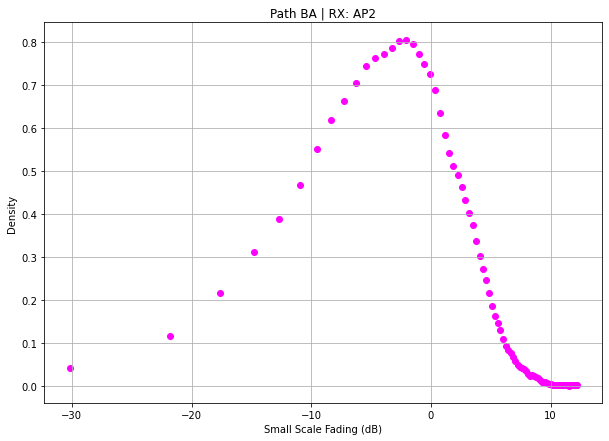

In [50]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [51]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(13172, 1455)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Best Fitness: 13163.696474706718
Best Gen: 185
Kappa: 1.2449753547547036
Mu: 1.04541984410775
Omega: 1.1914571836126902
Md: 0.6494057816458344
Elapsed time is 51.115849018096924 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Best Fitness: 1446.9415127551238
Best Gen: 198
Kappa: 0.6441262905021549
Mu: 1.0472944109504458
Omega: 1.2091794404539473
Md: 0.3905320480242843
Elapsed time is 39.38904333114624 seconds.


(13172, 1455)

#### Plots

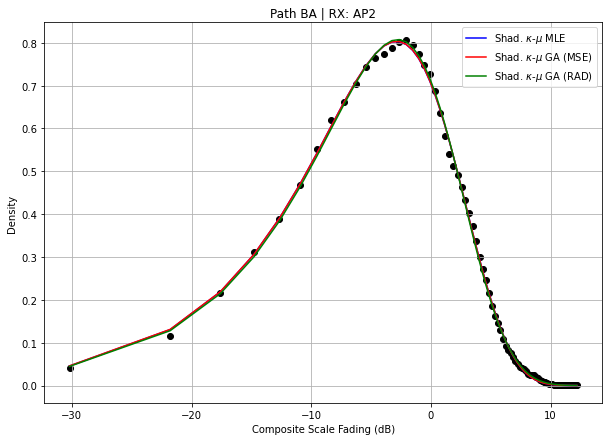

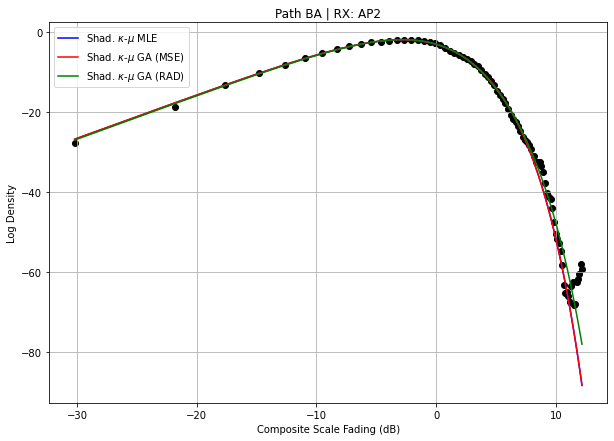

In [52]:
mle_sku_t1_pathBA_ap2 = [1.3112, 1.0473, 1.1923, 0.65995]
sku_t1_BA_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap2[0], mle_sku_t1_pathBA_ap2[1], mle_sku_t1_pathBA_ap2[2], mle_sku_t1_pathBA_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [53]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap2[0], mle_sku_t1_pathBA_ap2[1], mle_sku_t1_pathBA_ap2[2], mle_sku_t1_pathBA_ap2[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),28431.338148
1,Maximum Likelihood Estimator - Shad. KappaMu,28457.708908
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),28457.786884


### AP 3

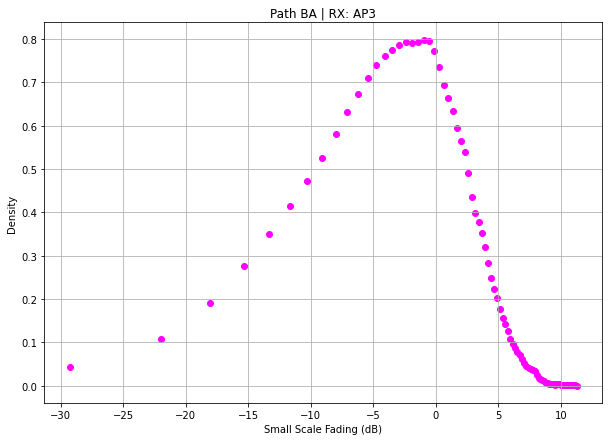

In [54]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [55]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(14043, 1833)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Best Fitness: 14028.042310582394
Best Gen: 179
Kappa: 3.2023127256580293
Mu: 1.0149119784762124
Omega: 1.1552289844383845
Md: 1.0619454634191987
Elapsed time is 48.34073448181152 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Best Fitness: 1660.7323218478996
Best Gen: 193
Kappa: 0.4426300266544519
Mu: 1.0611202369359924
Omega: 1.1856508321354506
Md: 0.47207073023082663
Elapsed time is 37.0255012512207 seconds.


(14043, 1833)

#### Plots

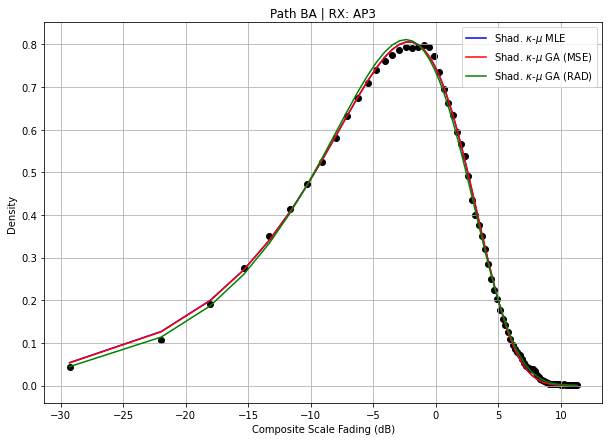

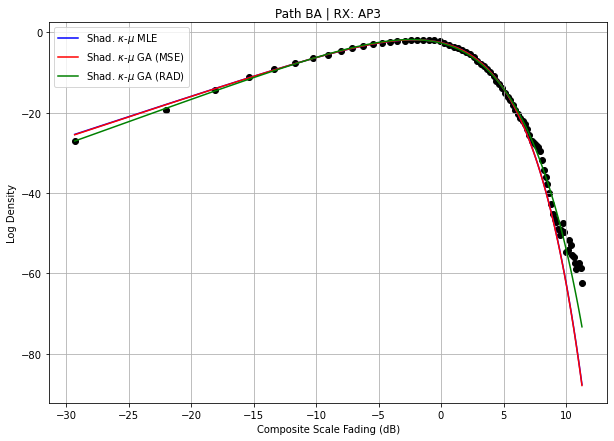

In [56]:
mle_sku_t1_pathBA_ap3 = [4.1792, 1.0119, 1.1558, 1.0559]
sku_t1_BA_ap3_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap3[0], mle_sku_t1_pathBA_ap3[1], mle_sku_t1_pathBA_ap3[2], mle_sku_t1_pathBA_ap3[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap3_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap3_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [57]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap3[0], mle_sku_t1_pathBA_ap3[1], mle_sku_t1_pathBA_ap3[2], mle_sku_t1_pathBA_ap3[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),26124.278244
1,Maximum Likelihood Estimator - Shad. KappaMu,26197.084896
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),26197.982068


### AP 4

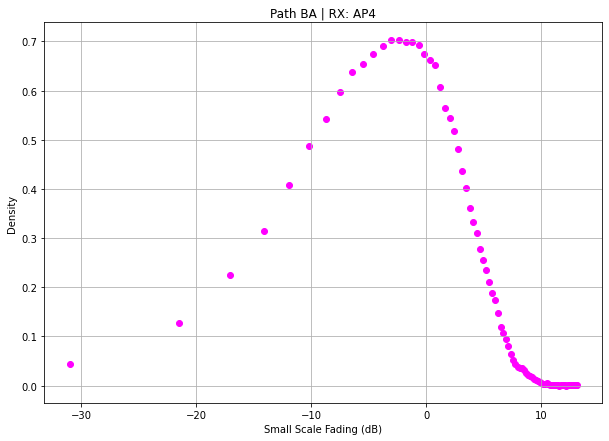

In [58]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [59]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(26561, 1251)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Best Fitness: 12665.804724360367
Best Gen: 171
Kappa: 0.5179620813118421
Mu: 0.9419276976850067
Omega: 1.380738941404251
Md: 0.5284767149585529
Elapsed time is 49.64337992668152 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Best Fitness: 1291.8412497942486
Best Gen: 187
Kappa: 0.1718963942971766
Mu: 0.9573339392034049
Omega: 1.3884256279422866
Md: 0.12635836219070895
Elapsed time is 35.416173696517944 seconds.


(26561, 1251)

#### Plots

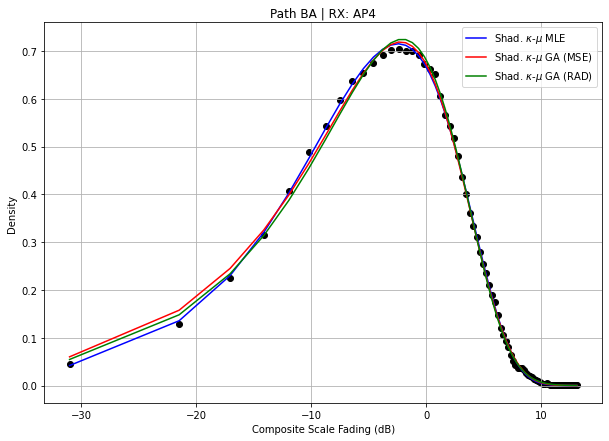

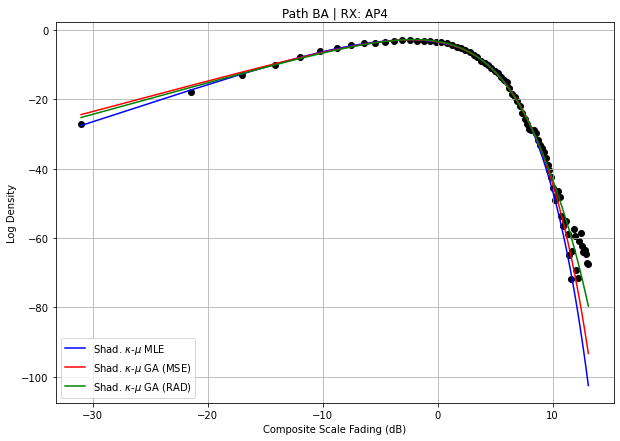

In [60]:
mle_sku_t1_pathBA_ap4 = [10, 1.0415, 1.3726, 0.87115]
sku_t1_BA_ap4_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap4[0], mle_sku_t1_pathBA_ap4[1], mle_sku_t1_pathBA_ap4[2], mle_sku_t1_pathBA_ap4[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap4_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap4_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [61]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap4[0], mle_sku_t1_pathBA_ap4[1], mle_sku_t1_pathBA_ap4[2], mle_sku_t1_pathBA_ap4[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31816.283352
1,Maximum Likelihood Estimator - Shad. KappaMu,31823.019665
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31839.612859


### AP 5

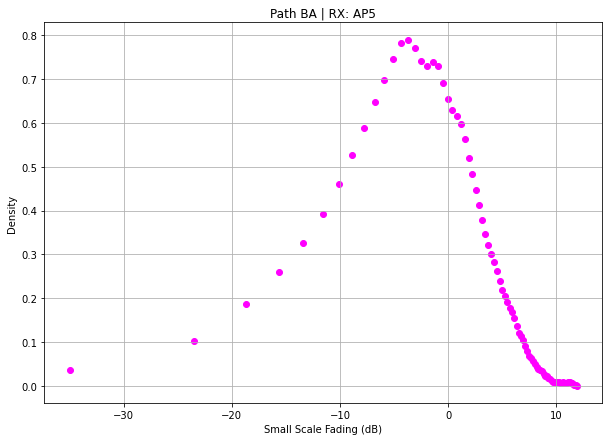

In [62]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [63]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(9354, 920)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Best Fitness: 9346.351333333212
Best Gen: 197
Kappa: 1.3238533550197116
Mu: 1.0752079538340087
Omega: 1.4162498792161433
Md: 0.41516371209841896
Elapsed time is 46.28587245941162 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Best Fitness: 920.5051248711443
Best Gen: 159
Kappa: 0.9124882893691454
Mu: 1.0299797391301213
Omega: 1.415707049325164
Md: 0.3259072232409415
Elapsed time is 34.33429741859436 seconds.


(9354, 920)

#### Plots

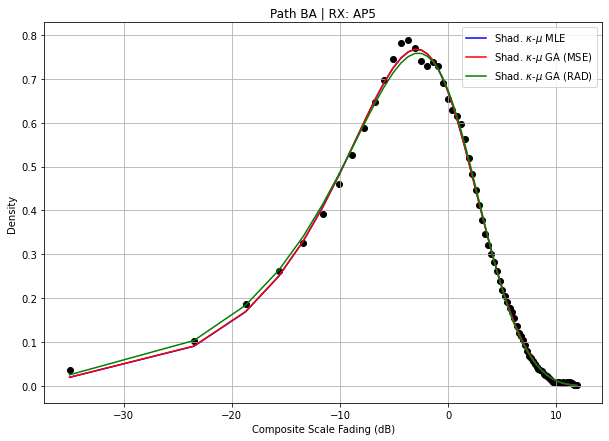

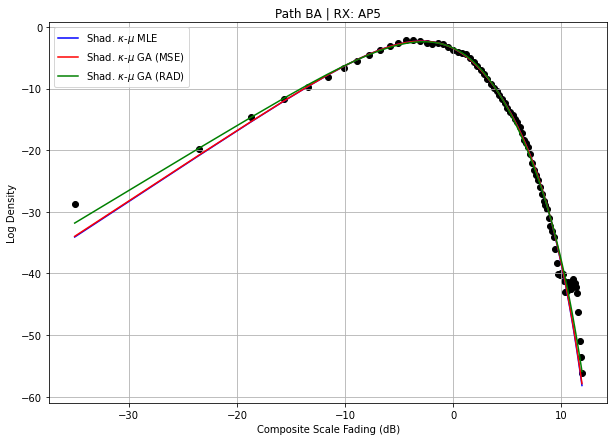

In [64]:
mle_sku_t1_pathBA_ap5 = [1.351, 1.0774, 1.4152, 0.42291]
sku_t1_BA_ap5_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap5[0], mle_sku_t1_pathBA_ap5[1], mle_sku_t1_pathBA_ap5[2], mle_sku_t1_pathBA_ap5[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap5_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap5_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [65]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap5[0], mle_sku_t1_pathBA_ap5[1], mle_sku_t1_pathBA_ap5[2], mle_sku_t1_pathBA_ap5[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31317.786571
1,Maximum Likelihood Estimator - Shad. KappaMu,31318.004686
2,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31326.684013


### AP 6

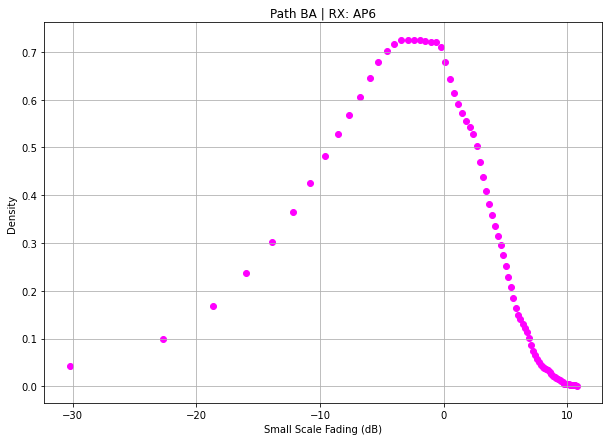

In [66]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [67]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(21985, 4407)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Best Fitness: 22815.847988139194
Best Gen: 141
Kappa: 3.9698252591562326
Mu: 1.0532865659292858
Omega: 1.3746098126650357
Md: 0.8439630354885644
Elapsed time is 46.94318699836731 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Best Fitness: 4092.215827461057
Best Gen: 199
Kappa: 1.8462150857725694
Mu: 1.0295630071465312
Omega: 1.3811439612853496
Md: 0.7611463735187118
Elapsed time is 32.16755390167236 seconds.


(21985, 4407)

#### Plots

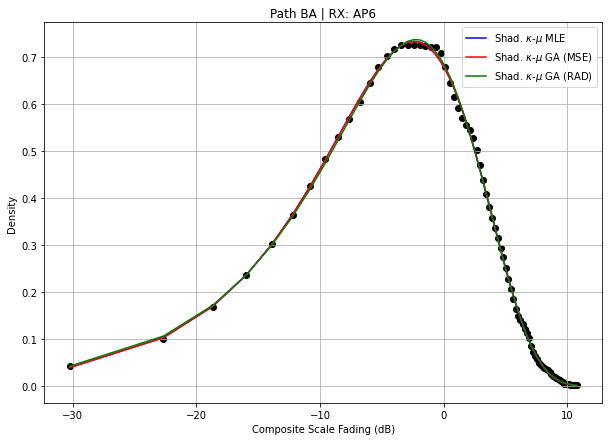

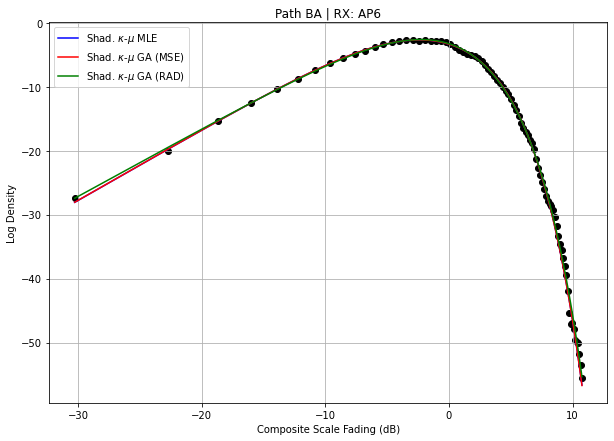

In [68]:
mle_sku_t1_pathBA_ap6 = [3.9114, 1.0536, 1.3752, 0.8415]
sku_t1_BA_ap6_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap6[0], mle_sku_t1_pathBA_ap6[1], mle_sku_t1_pathBA_ap6[2], mle_sku_t1_pathBA_ap6[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap6_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap6_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [69]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap6[0], mle_sku_t1_pathBA_ap6[1], mle_sku_t1_pathBA_ap6[2], mle_sku_t1_pathBA_ap6[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Maximum Likelihood Estimator - Shad. KappaMu,30856.682597
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),30856.739344
2,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),30864.665280


### AP 7

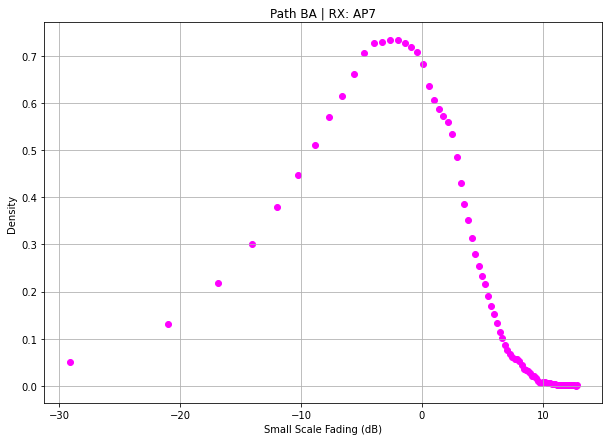

In [70]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [71]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(10756, 1898)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Best Fitness: 8064.734868946903
Best Gen: 199
Kappa: 0.16019083114693947
Mu: 0.968932119250903
Omega: 1.3177705555244774
Md: 0.3066351554135914
Elapsed time is 42.749547243118286 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Best Fitness: 1888.188481941301
Best Gen: 197
Kappa: 0.44197936907957064
Mu: 1.0159264690370708
Omega: 1.3921212749964527
Md: 0.25075073943405857
Elapsed time is 35.52306294441223 seconds.


(10756, 1898)

#### Plots

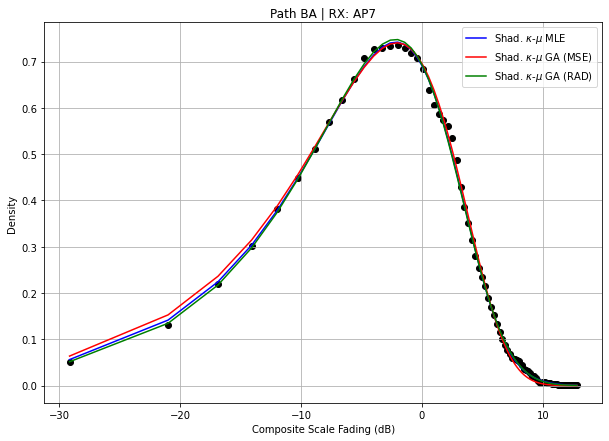

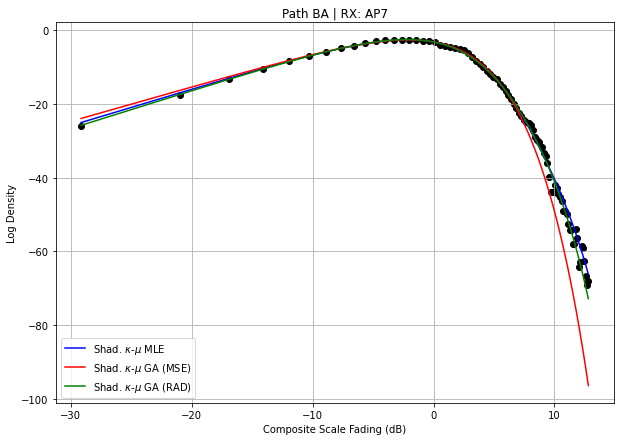

In [72]:
mle_sku_t1_pathBA_ap7 = [0.27942, 0.9958, 1.4008, 0.12741]
sku_t1_BA_ap7_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap7[0], mle_sku_t1_pathBA_ap7[1], mle_sku_t1_pathBA_ap7[2], mle_sku_t1_pathBA_ap7[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap7_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap7_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [73]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap7[0], mle_sku_t1_pathBA_ap7[1], mle_sku_t1_pathBA_ap7[2], mle_sku_t1_pathBA_ap7[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),32302.430462
1,Maximum Likelihood Estimator - Shad. KappaMu,32316.000710
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),32493.546465


### AP 8

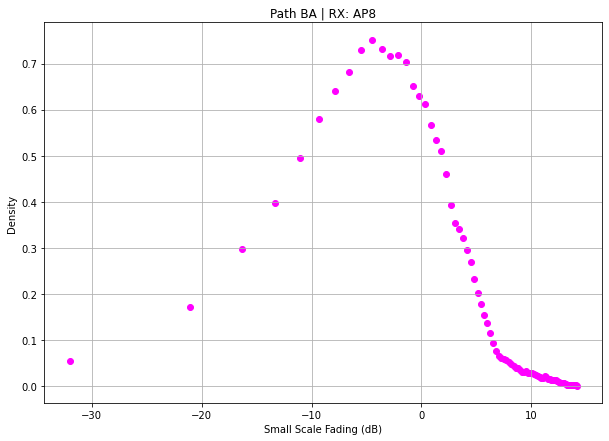

In [84]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [85]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(7014, 673)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Best Fitness: 7481.35085329535
Best Gen: 188
Kappa: 0.7940515802079455
Mu: 0.9258967437473803
Omega: 1.554485053296374
Md: 0.13811857571235323
Elapsed time is 46.01481771469116 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Best Fitness: 673.2504483554264
Best Gen: 145
Kappa: 0.7592701434865894
Mu: 0.9383081391047186
Omega: 1.6409956250407154
Md: 0.093855033554995
Elapsed time is 36.85465431213379 seconds.


(7014, 673)

#### Plots

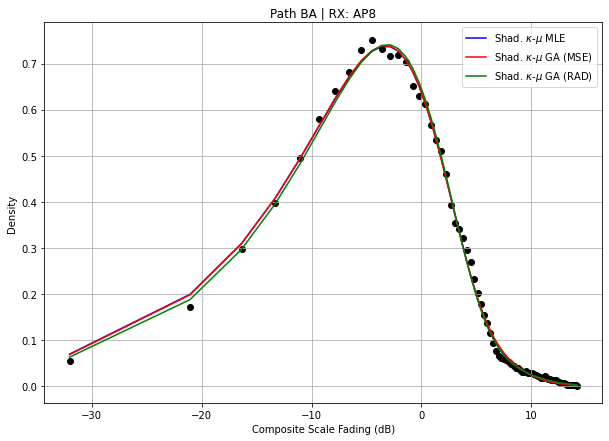

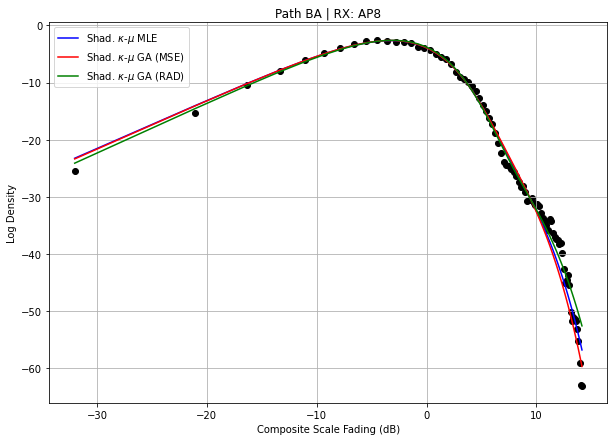

In [86]:
mle_sku_t1_pathBA_ap8 = [0.76344, 0.92246, 1.581, 0.11813]
sku_t1_BA_ap8_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap8[0], mle_sku_t1_pathBA_ap8[1], mle_sku_t1_pathBA_ap8[2], mle_sku_t1_pathBA_ap8[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap8_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap8_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [87]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap8[0], mle_sku_t1_pathBA_ap8[1], mle_sku_t1_pathBA_ap8[2], mle_sku_t1_pathBA_ap8[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Maximum Likelihood Estimator - Shad. KappaMu,34789.029802
1,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),34790.317052
2,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),34804.083930


### AP 9

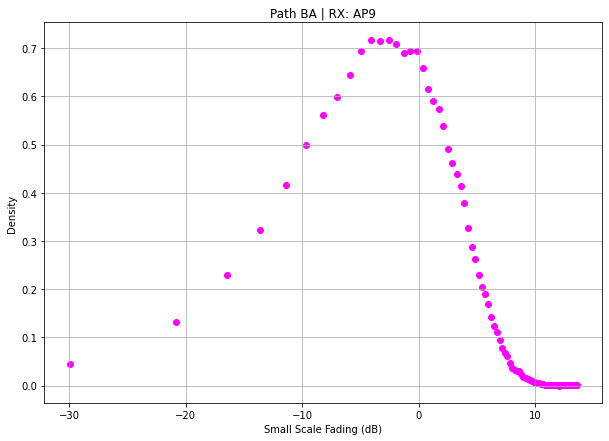

In [88]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [89]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)
(26204, 1668)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Best Fitness: 23989.28867822708
Best Gen: 198
Kappa: 5.892884973972874
Mu: 1.0439032925261216
Omega: 1.3715396664596808
Md: 0.8530018706709697
Elapsed time is 48.18161916732788 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Best Fitness: 1668.5236562356445
Best Gen: 182
Kappa: 4.386958619213089
Mu: 1.0472053062956646
Omega: 1.3829811298044288
Md: 0.817543444454477
Elapsed time is 44.812490463256836 seconds.


(26204, 1668)

#### Plots

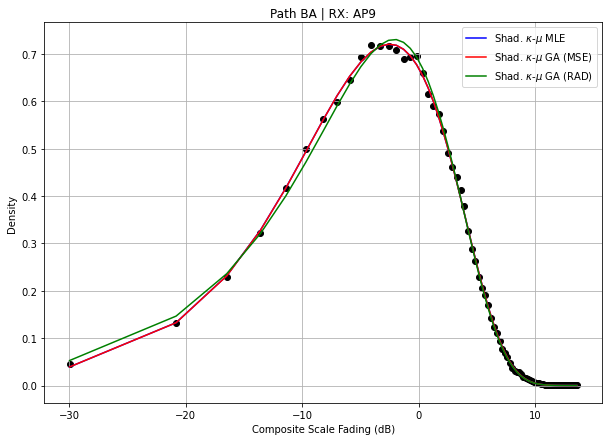

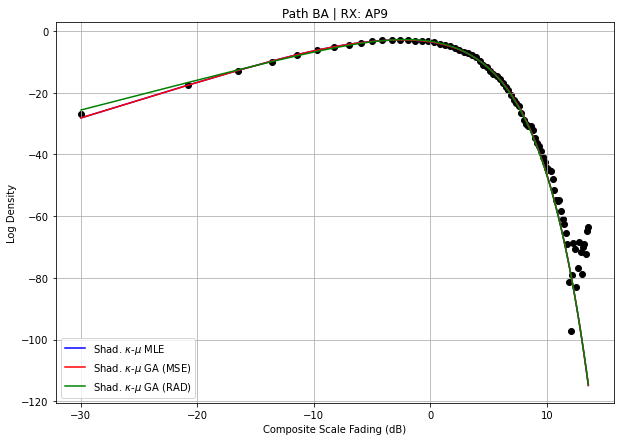

In [80]:
mle_sku_t1_pathBA_ap9 = [9.0267, 1.086, 1.3744, 0.86735]
sku_t1_BA_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap9[0], mle_sku_t1_pathBA_ap9[1], mle_sku_t1_pathBA_ap9[2], mle_sku_t1_pathBA_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_BA_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_BA_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [81]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathBA_ap9[0], mle_sku_t1_pathBA_ap9[1], mle_sku_t1_pathBA_ap9[2], mle_sku_t1_pathBA_ap9[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31323.355793
1,Maximum Likelihood Estimator - Shad. KappaMu,31323.445877
2,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31356.958198
